In [ ]:
import pandas as pd
few_shot = '/content/extracted_relations_few_shot.csv'
zero_shot = '/content/extracted_relations_zero_shot.csv'
df_few_shot = pd.read_csv(few_shot)
df_zero_shot = pd.read_csv(zero_shot)

<ipython-input-8-ab15dc65af95>:47: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='interaction_type', y='expt_weight', data=drug_data, ci=None, palette='coolwarm')
<ipython-input-8-ab15dc65af95>:47: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='interaction_type', y='expt_weight', data=drug_data, ci=None, palette='coolwarm')
<ipython-input-8-ab15dc65af95>:47: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='interaction_type', y='expt_weight', data=drug_data, ci=None, palette='coolwarm')
<ipython-input-8-ab15dc65af95>:47: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(

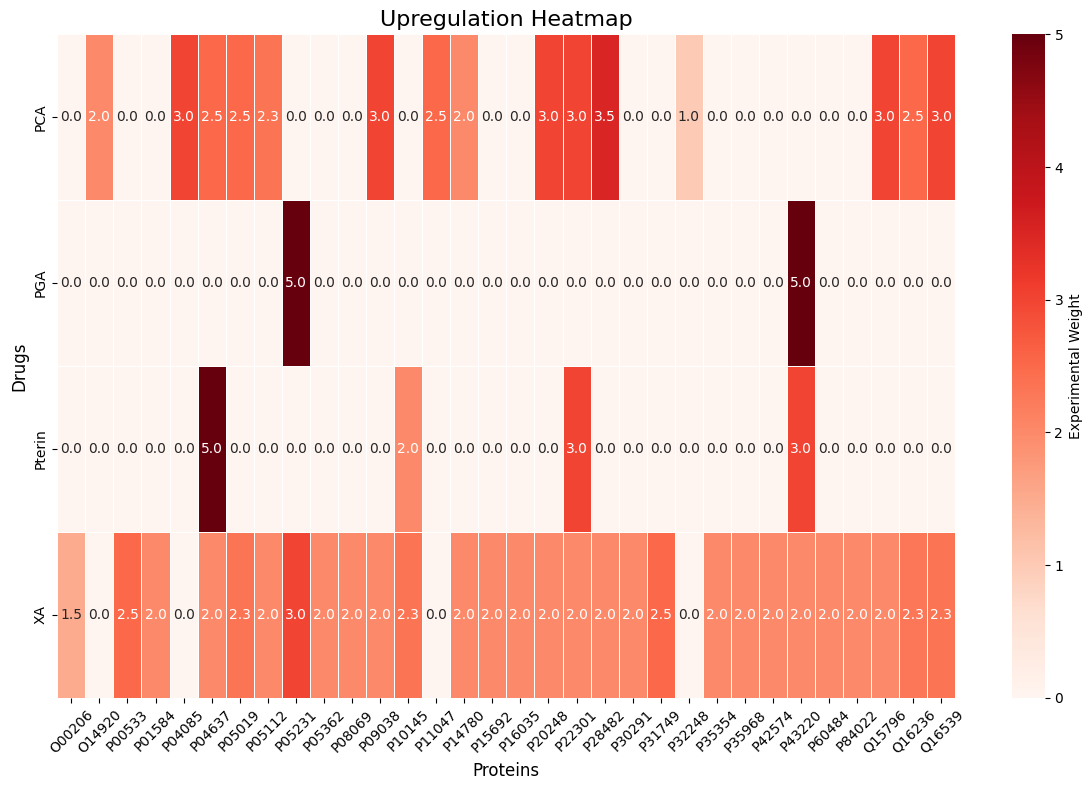

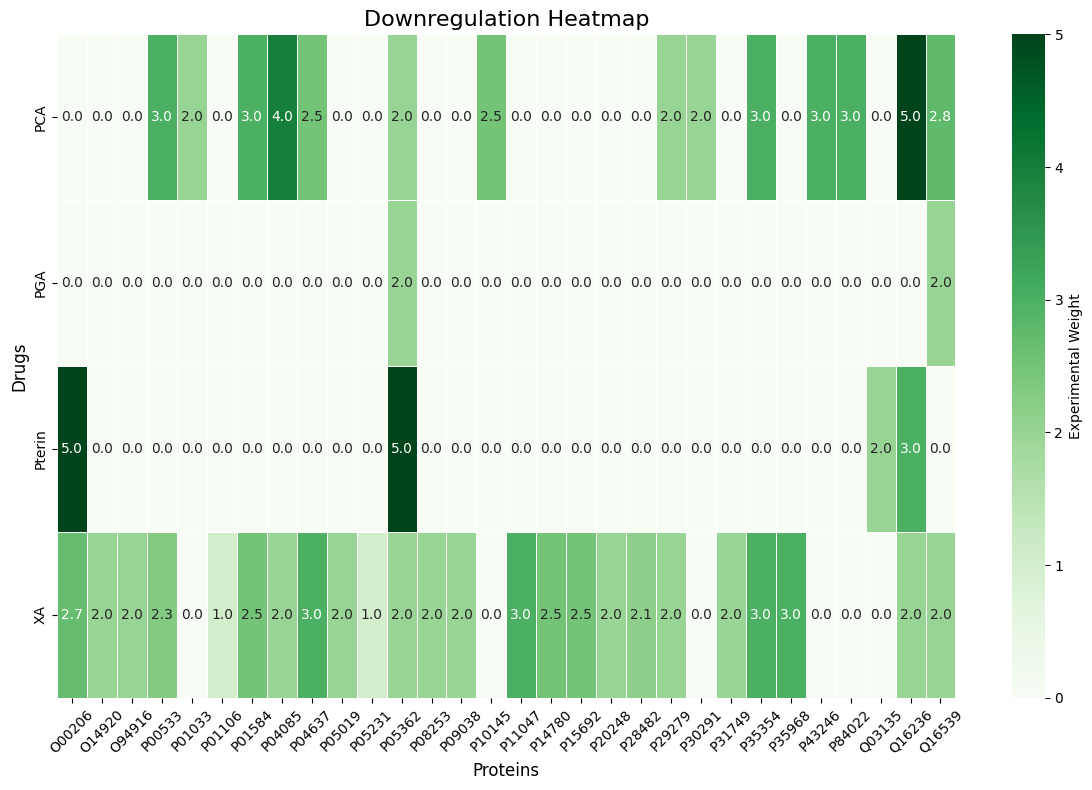

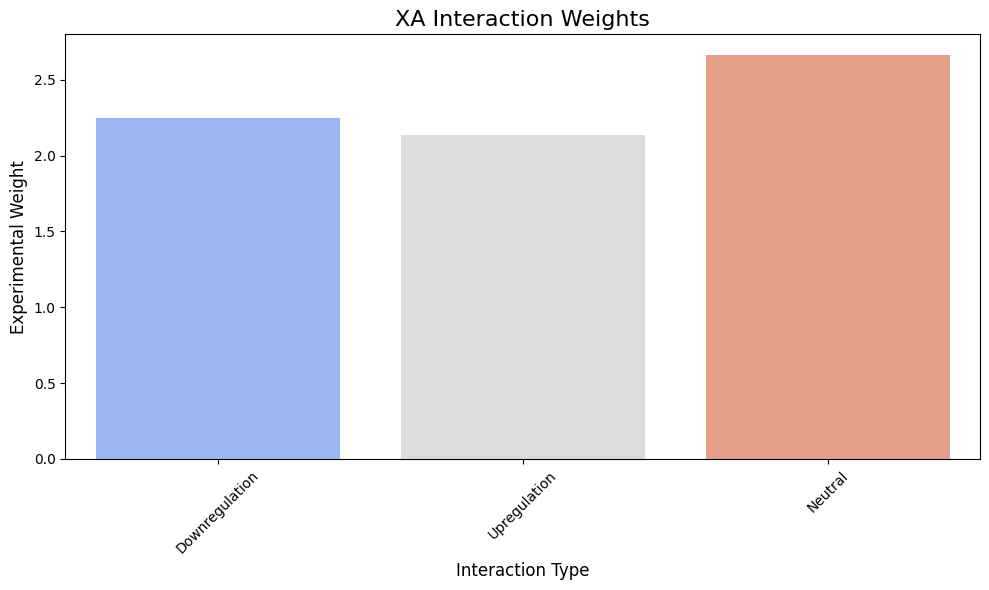

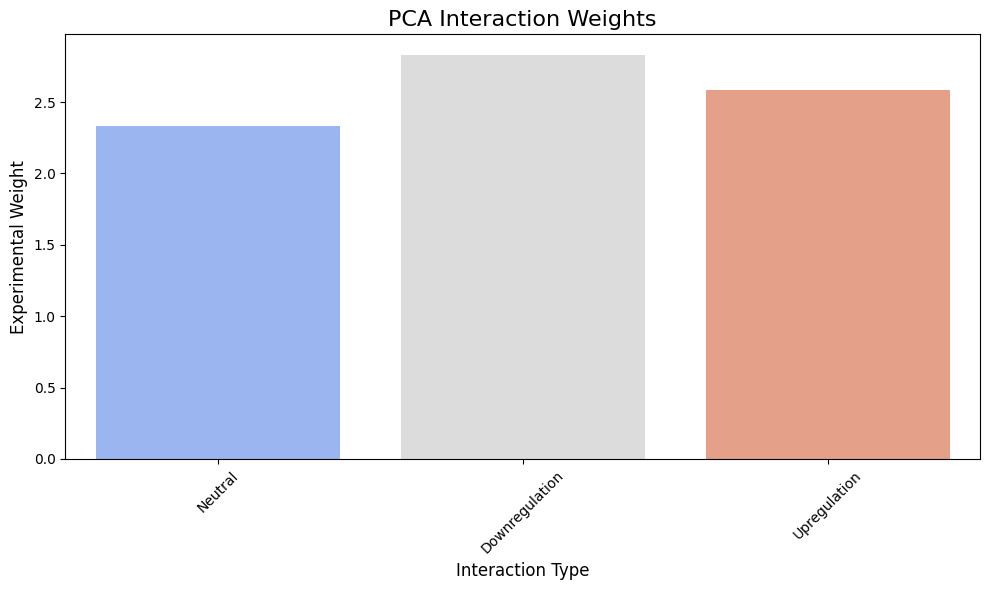

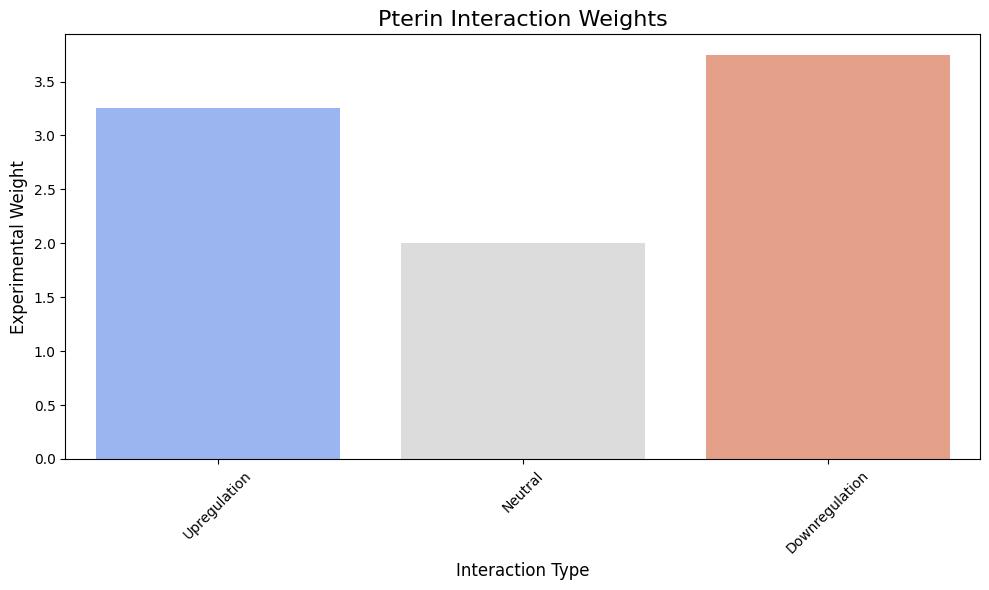

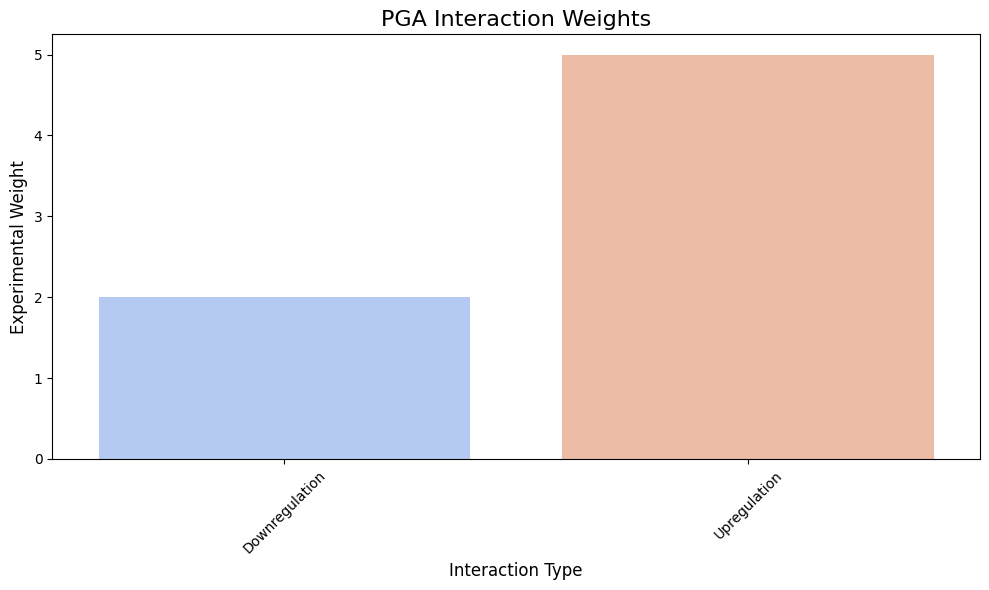

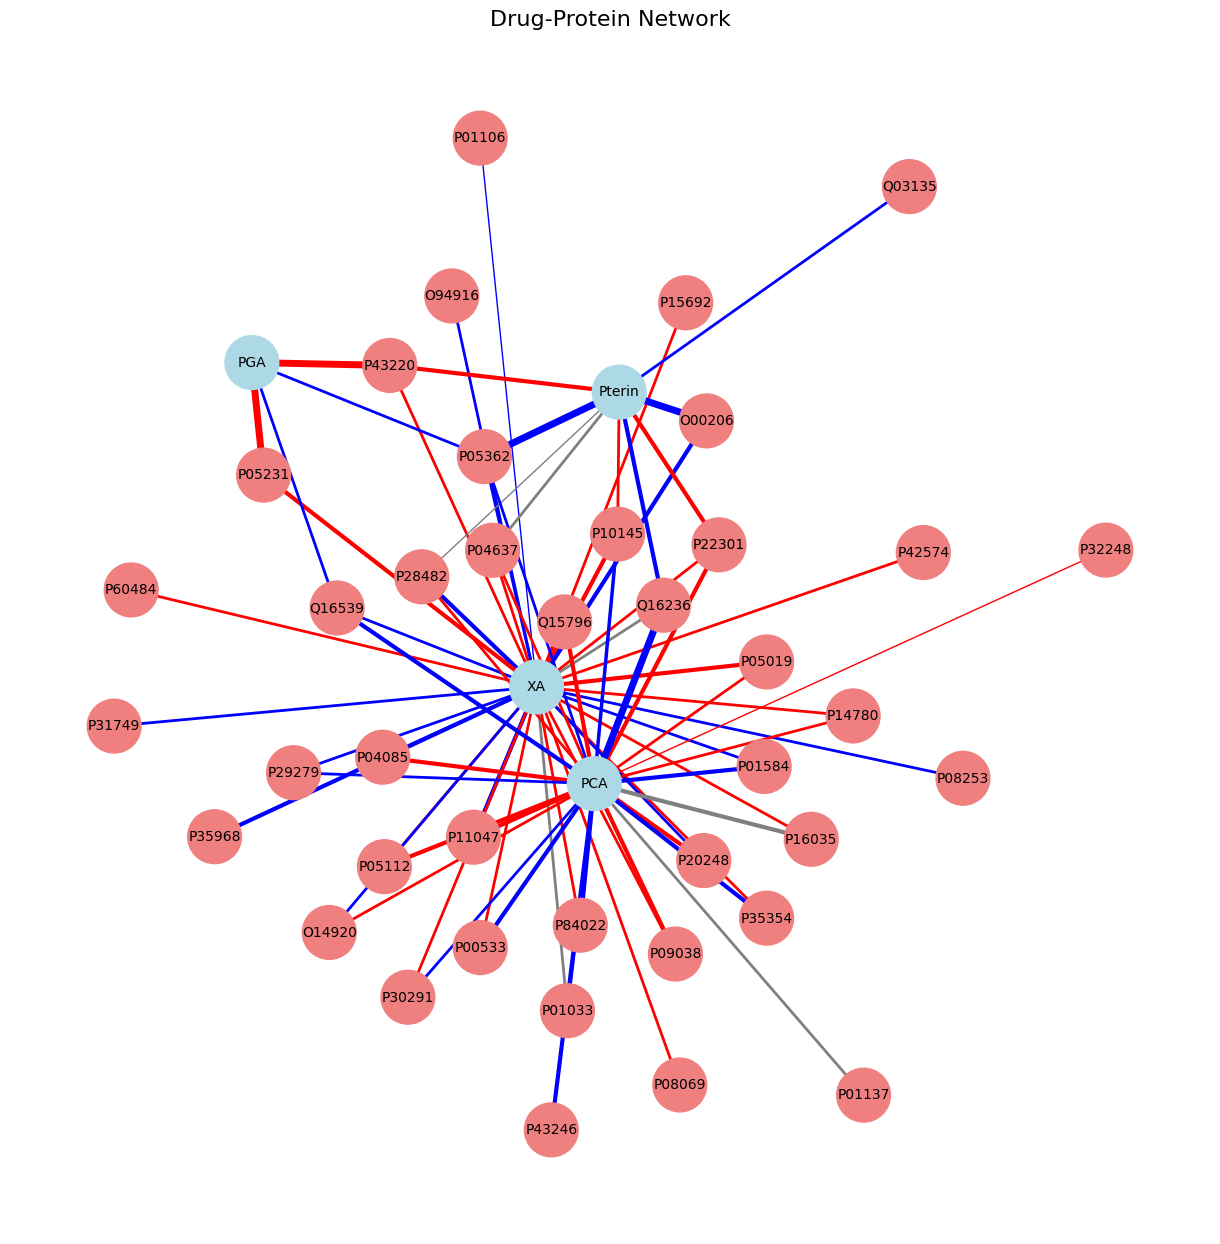

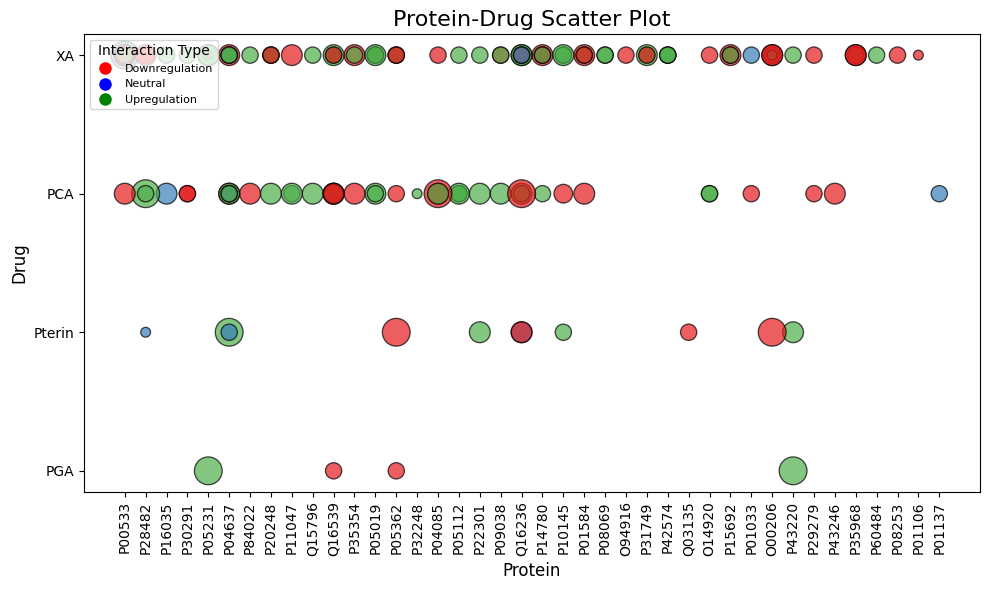

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import networkx as nx
import os

# Function to generate all visualizations from the input CSV file
def generate_visualizations(csv_file, output_dir):
    # Load the dataset
    data = pd.read_csv(csv_file)

    # Ensure the output directory exists
    os.makedirs(output_dir, exist_ok=True)

    # Create pivot tables for upregulation and downregulation heatmaps
    upregulation_data = data[data['interaction_type'] == 'Upregulation']
    downregulation_data = data[data['interaction_type'] == 'Downregulation']
    upregulation_counts = upregulation_data.pivot_table(index='Query_Drug', columns='Query_Protein', values='expt_weight', aggfunc='mean', fill_value=0)
    downregulation_counts = downregulation_data.pivot_table(index='Query_Drug', columns='Query_Protein', values='expt_weight', aggfunc='mean', fill_value=0)

    # 1. Upregulation Heatmap
    plt.figure(figsize=(12, 8))
    sns.heatmap(upregulation_counts, cmap="Reds", linewidths=0.5, annot=True, fmt='.1f', cbar_kws={'label': 'Experimental Weight'})
    plt.title("Upregulation Heatmap", fontsize=16)
    plt.xlabel("Proteins", fontsize=12)
    plt.ylabel("Drugs", fontsize=12)
    plt.xticks(rotation=45, fontsize=10)
    plt.yticks(fontsize=10)
    plt.tight_layout()
    plt.savefig(f"{output_dir}/upregulation_heatmap.png")

    # 2. Downregulation Heatmap
    plt.figure(figsize=(12, 8))
    sns.heatmap(downregulation_counts, cmap="Greens", linewidths=0.5, annot=True, fmt='.1f', cbar_kws={'label': 'Experimental Weight'})
    plt.title("Downregulation Heatmap", fontsize=16)
    plt.xlabel("Proteins", fontsize=12)
    plt.ylabel("Drugs", fontsize=12)
    plt.xticks(rotation=45, fontsize=10)
    plt.yticks(fontsize=10)
    plt.tight_layout()
    plt.savefig(f"{output_dir}/downregulation_heatmap.png")

    # 3. Bar charts for each drug
    for drug in data['Query_Drug'].unique():
        drug_data = data[data['Query_Drug'] == drug]
        plt.figure(figsize=(10, 6))
        sns.barplot(x='interaction_type', y='expt_weight', data=drug_data, ci=None, palette='coolwarm')
        plt.title(f"{drug} Interaction Weights", fontsize=16)
        plt.xlabel("Interaction Type", fontsize=12)
        plt.ylabel("Experimental Weight", fontsize=12)
        plt.xticks(rotation=45, fontsize=10)
        plt.yticks(fontsize=10)
        plt.tight_layout()
        plt.savefig(f"{output_dir}/{drug}_interaction_weights.png")

    # 4. Network graph of drug-protein interactions
    G = nx.Graph()

    for index, row in data.iterrows():
        G.add_edge(row['Query_Drug'], row['Query_Protein'], weight=row['expt_weight'], interaction=row['interaction_type'])

    plt.figure(figsize=(12, 12))
    pos = nx.spring_layout(G, k=0.5)
    edges = G.edges(data=True)
    colors = ['red' if edge[2]['interaction'] == 'Upregulation' else 'blue' if edge[2]['interaction'] == 'Downregulation' else 'gray' for edge in edges]
    weights = [edge[2]['weight'] for edge in edges]
    node_colors = ['lightblue' if node in data['Query_Drug'].values else 'lightcoral' for node in G.nodes()]

    nx.draw(G, pos, with_labels=True, node_color=node_colors, edge_color=colors, width=weights, edge_cmap=plt.cm.Blues, node_size=1500, font_size=10, font_color='black')
    plt.title("Drug-Protein Network", fontsize=16)
    plt.savefig(f"{output_dir}/drug_protein_network.png")

    # 5. Scatter plot of Protein vs. Drug with interaction type and experimental weight
    plt.figure(figsize=(10, 6))
    scatter_plot = sns.scatterplot(x='Query_Protein', y='Query_Drug', hue='interaction_type', size='expt_weight', data=data, sizes=(50, 400), palette='Set1', marker='o', edgecolor='black', alpha=0.7)
    legend_handles = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='red', markersize=10, label='Downregulation'),
                      plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='blue', markersize=10, label='Neutral'),
                      plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='green', markersize=10, label='Upregulation')]
    scatter_plot.legend(handles=legend_handles, loc='upper left', title='Interaction Type', fontsize=8, title_fontsize=10)
    plt.title("Protein-Drug Scatter Plot", fontsize=16)
    plt.xlabel("Protein", fontsize=12)
    plt.ylabel("Drug", fontsize=12)
    plt.xticks(rotation=90, fontsize=10)
    plt.yticks(fontsize=10)
    plt.tight_layout()
    plt.savefig(f"{output_dir}/protein_drug_scatter_plot.png")

# Example usage:
generate_visualizations('extracted_relations_zero_shot.csv', 'output_plots')